In [2]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [ ]:
# 1. Load Raw Data
df = pd.read_csv("../data/raw/fashion_retail_sales.csv")
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [4]:
# 2. Check Initial Info and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [5]:
# Check for Missing Values
df.isnull().sum().sort_values(ascending=False)

Purchase Amount (USD)    650
Review Rating            324
Customer Reference ID      0
Item Purchased             0
Date Purchase              0
Payment Method             0
dtype: int64

In [6]:
# Summary Statistics for all columns
# Note: This will include categorical columns as well
df.describe(include='all')

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
count,3400.000000,3400,2750.000000,3400,3076.000000,3400
unique,NaN,50,NaN,365,NaN,2
top,NaN,Belt,NaN,22-09-2023,NaN,Credit Card
freq,NaN,90,NaN,17,NaN,1770
mean,4039.660588,NaN,156.709818,NaN,2.999057,NaN
std,48.122583,NaN,419.536669,NaN,1.156505,NaN
min,3957.000000,NaN,10.000000,NaN,1.000000,NaN
25%,3997.000000,NaN,57.000000,NaN,2.000000,NaN
50%,4040.000000,NaN,110.000000,NaN,3.000000,NaN
75%,4081.000000,NaN,155.750000,NaN,4.000000,NaN


In [7]:
# 3. Data Cleaning
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Format data types
# Convert 'Date Purchase' to datetime
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='%d-%m-%Y')

# Convert 'Customer Reference ID' to string
df['Customer Reference ID'] = df['Customer Reference ID'].astype(str)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Re-check data types
df.dtypes

Number of duplicate rows: 0


customer_reference_id            object
item_purchased                   object
purchase_amount_(usd)           float64
date_purchase            datetime64[ns]
review_rating                   float64
payment_method                   object
dtype: object

In [8]:
# 4. Handle Missing Values
# Extract rows with missing values
missing_values = df[df.isnull().any(axis=1)]
print("Entries with missing values: ",missing_values.shape[0], "rows")
# Display the first few rows with missing values
missing_values.head()

Entries with missing values:  913 rows


,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
9,4010,Loafers,4233.0,2023-06-11,NaN,Credit Card
12,4068,Pajamas,3728.0,2022-12-09,NaN,Credit Card
15,4096,Poncho,2383.0,2023-04-10,NaN,Credit Card
19,4103,Romper,4465.0,2022-11-21,NaN,Credit Card


In [9]:
# Check missing values in 'item_purchased' column
items_with_null = missing_values['item_purchased'].value_counts()
print("Items with missing values: \n", items_with_null)

# Count the number of unique items with missing values
print("Unique items with missing values: ", len(items_with_null))

Items with missing values: 
 Romper           28
Pants            27
T-shirt          26
Skirt            25
Belt             25
Pajamas          25
Blouse           24
Socks            24
Loafers          23
Tank Top         22
Blazer           21
Leggings         20
Raincoat         20
Swimsuit         20
Hat              19
Vest             19
Backpack         19
Boots            19
Trousers         19
Handbag          19
Poncho           19
Jacket           19
Shorts           18
Hoodie           18
Onesie           18
Sweater          18
Kimono           18
Sneakers         18
Polo Shirt       18
Umbrella         18
Coat             17
Tie              17
Jumpsuit         17
Wallet           17
Slippers         17
Camisole         16
Overalls         16
Bowtie           16
Jeans            16
Cardigan         15
Flip-Flops       14
Dress            14
Trench Coat      14
Sunglasses       13
Sun Hat          13
Flannel Shirt    12
Sandals          11
Scarf            11
Gloves     

> _It looks like every item in the store has a missing value._; _either `purchase_amount` or `review_rating`_

Lets go ahead and explore missing percentages in the columns with missing values

In [10]:
# Percentage of missing values in each column
col_null_percentage = df.isnull().mean() * 100
col_null_percentage = col_null_percentage[col_null_percentage > 0].sort_values(ascending=False)
print("Percentage of missing values in each column:")
print(col_null_percentage)

# Percentage of missing values in the dataset
null_percentage = len(missing_values) / len(df) * 100
print(f"Percentage of rows with missing values: {null_percentage:.2f}%") 

Percentage of missing values in each column:
purchase_amount_(usd)    19.117647
review_rating             9.529412
dtype: float64
Percentage of rows with missing values: 26.85%


In [11]:
missing_values['customer_reference_id'].value_counts()

4034    12
3962    12
4083    11
4035    10
3987    10
        ..
4015     2
4060     1
4067     1
4024     1
4026     1
Name: customer_reference_id, Length: 166, dtype: int64

In [12]:
# Replace missing Purchase Amounts with item-level means
df["purchase_amount_(usd)"] = df.groupby("item_purchased")["purchase_amount_(usd)"]\
    .transform(lambda x: x.fillna(x.mean()))

# Replace missing Review Ratings with item-level means
df["review_rating"] = df.groupby("item_purchased")["review_rating"]\
    .transform(lambda x: x.fillna(x.mean()))

In [13]:
# Re-check for missing values after imputation
df.isnull().sum().sort_values(ascending=False)

customer_reference_id    0
item_purchased           0
purchase_amount_(usd)    0
date_purchase            0
review_rating            0
payment_method           0
dtype: int64

> Imputed missing purchase amounts and review ratings using item-level means, preserving all rows in the dataset and retaining item-specific pricing/review trends.

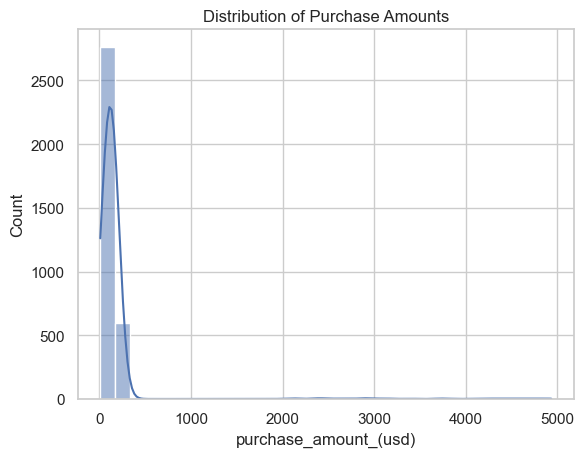

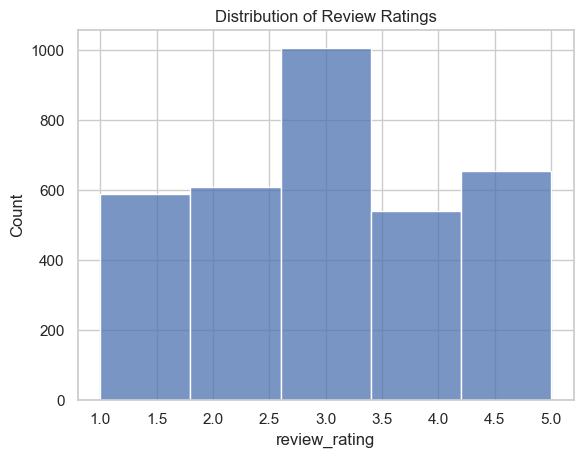

In [14]:

sns.histplot(df['purchase_amount_(usd)'], bins=30, kde=True)
plt.title("Distribution of Purchase Amounts")
plt.show()

sns.histplot(df['review_rating'], bins=5, kde=False)
plt.title("Distribution of Review Ratings")
plt.show()

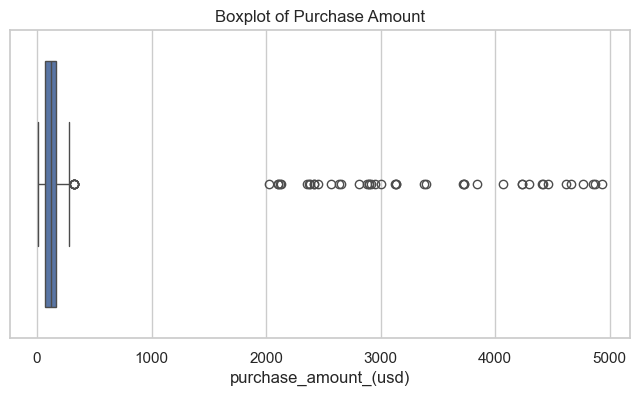

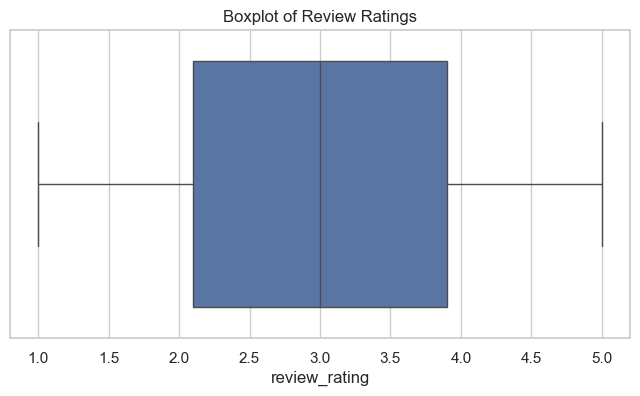

In [ ]:
# 7. Outlier Detection (optional visual checks)

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['purchase_amount_(usd)'])
plt.title("Boxplot of Purchase Amount")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['review_rating'])
plt.title("Boxplot of Review Ratings")
plt.show()


In [16]:
df['purchase_amount_(usd)'].describe()

count    3400.000000
mean      156.578638
std       377.892012
min        10.000000
25%        70.000000
50%       118.531915
75%       161.885593
max      4932.000000
Name: purchase_amount_(usd), dtype: float64

> `purchase_amount_(usd)` feature is right skewed with a long tail. Most items are priced under $200, but a few outliers push the average way up.

In [17]:
# 8. Save Cleaned Data
df.to_csv("../data/processed/cleaned_fashion_sales.csv", index=False)
print("Cleaned data saved to data/processed/")

Cleaned data saved to data/processed/
